In [1]:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
    !apt-get update -qq 2>&1 > /dev/null
    !apt-get -y install -qq google-drive-ocamlfuse fuse
    from google.colab import auth
    auth.authenticate_user()
    from oauth2client.client import GoogleCredentials
    creds = GoogleCredentials.get_application_default()
    import getpass
    !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
    vcode = getpass.getpass()
    !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import math
import os
import tensorflow as tf
from matplotlib import pyplot as plt

In [0]:
import os
os.chdir("/content/drive/im2txto")

In [0]:
import configuration
import inference_wrapper
from inference_utils import caption_generator
from inference_utils import vocabulary

In [0]:
FLAGS = tf.flags.FLAGS

In [0]:
def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)
    return keys_list,flags_dict

In [0]:
def showandtell(_):
  # Build the inference graph.
  g = tf.Graph()
  with g.as_default():
    model = inference_wrapper.InferenceWrapper()
    restore_fn = model.build_graph_from_config(configuration.ModelConfig(),
                                               FLAGS.checkpoint_path)
  g.finalize()

  # Create the vocabulary.
  vocab = vocabulary.Vocabulary(FLAGS.vocab_file)
  with tf.Session(graph=g) as sess:
    # Load the model from checkpoint.
    restore_fn(sess)

    # Prepare the caption generator. Here we are implicitly using the default
    # beam search parameters. See caption_generator.py for a description of the
    # available beam search parameters.
    generator = caption_generator.CaptionGenerator(model, vocab)
    for i in range(1,10):
      tf.flags.DEFINE_string("input_files", "./outdoor_images/" + str(i) + ".jpg","File pattern or comma-separated list of file patterns of image files.")
      with tf.gfile.GFile(FLAGS.input_files, "rb") as f:
        image = f.read()
      captions = generator.beam_search(sess, image)
      img = plt.imread('outdoor_images/' + str(i) + '.jpg')
      plt.figure()
      plt.imshow(img)
      plt.show()
      print("Caption for image %s:" % os.path.basename(FLAGS.input_files))
      for i, caption in enumerate(captions):
        # Ignore begin and end words.
        sentence = [vocab.id_to_word(w) for w in caption.sentence[1:-1]]
        sentence = " ".join(sentence)
        print("  %d) %s (p=%f)" % (i, sentence, math.exp(caption.logprob)))
      """sentence = [vocab.id_to_word(w) for w in captions[0].sentence[1:-1]]
      sentence = " ".join(sentence)
      print("%s (p=%f)" % (sentence, math.exp(captions[0].logprob)))"""
      FLAGS.__delattr__('input_files')

In [0]:
keys_list,flags_dict = del_all_flags(FLAGS)

In [0]:
tf.flags.DEFINE_string("checkpoint_path", "./model.ckpt-2000000",
                       "Model checkpoint file or directory containing a "
                       "model checkpoint file.")
tf.flags.DEFINE_string("vocab_file", "./word_counts.txt", "Text file containing the vocabulary.")
tf.logging.set_verbosity(tf.logging.INFO)

INFO:tensorflow:Building model.
INFO:tensorflow:Initializing vocabulary from file: ./word_counts.txt
INFO:tensorflow:Created vocabulary with 11520 words
INFO:tensorflow:Loading model from checkpoint: ./model.ckpt-2000000
INFO:tensorflow:Restoring parameters from ./model.ckpt-2000000
INFO:tensorflow:Successfully loaded checkpoint: model.ckpt-2000000


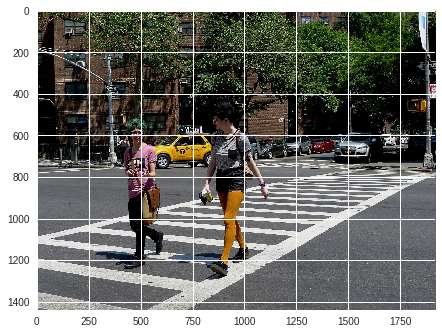

Caption for image 1.jpg:
  0) a couple of people walking down a street . (p=0.000533)
  1) a couple of people that are standing in the street . (p=0.000412)
  2) a couple of people that are walking down the street (p=0.000209)


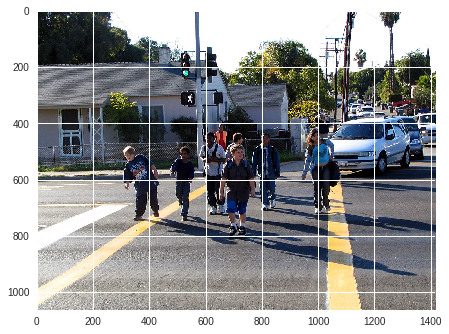

Caption for image 2.jpg:
  0) a group of people walking down a street . (p=0.004048)
  1) a group of people riding bikes down a street . (p=0.002783)
  2) a group of people walking down the street (p=0.000469)


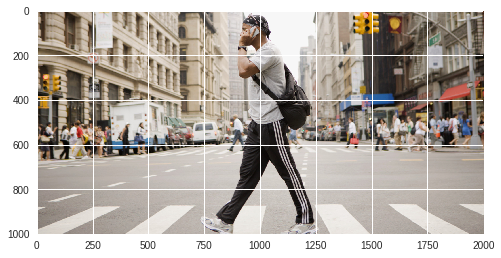

Caption for image 3.jpg:
  0) a man riding a skateboard down a street . (p=0.005575)
  1) a man riding a skateboard down a sidewalk . (p=0.001300)
  2) a man riding a skateboard down the street (p=0.000224)


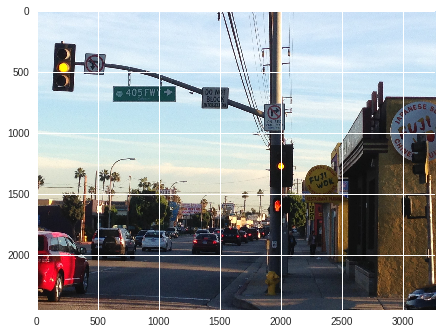

Caption for image 4.jpg:
  0) a traffic light sitting on the side of a road . (p=0.001889)
  1) a traffic light sitting on the side of a street . (p=0.000863)
  2) a traffic light on a city street near a building (p=0.000086)


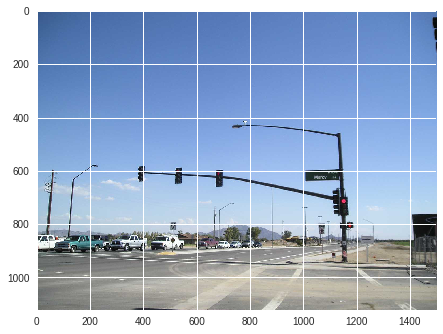

Caption for image 5.jpg:
  0) a traffic light sitting on the side of a road . (p=0.001449)
  1) a traffic light sitting on the side of a street . (p=0.000282)
  2) a traffic light sitting on the side of the road . (p=0.000103)


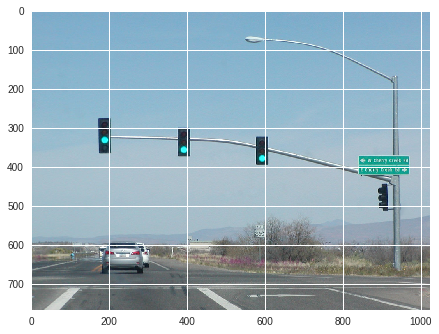

Caption for image 6.jpg:
  0) a traffic light sitting on the side of a road . (p=0.001796)
  1) a traffic light sitting on the side of a street . (p=0.000310)
  2) a traffic light sitting on the side of the road . (p=0.000144)


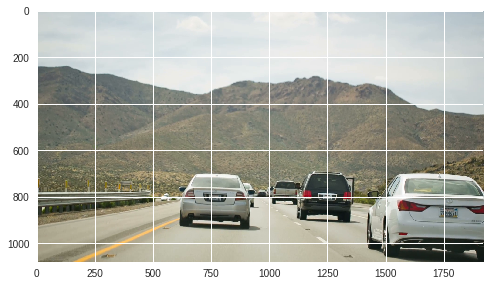

Caption for image 7.jpg:
  0) a truck driving down a road with a mountain in the background . (p=0.000024)
  1) a car driving down a road next to a herd of sheep . (p=0.000024)
  2) a truck driving down a road with a mountain in the background (p=0.000013)


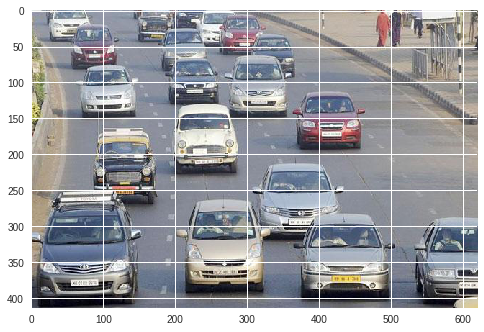

Caption for image 8.jpg:
  0) a city street filled with lots of traffic . (p=0.003912)
  1) a city street filled with lots of traffic and traffic . (p=0.000240)
  2) a city street filled with lots of traffic and tall buildings . (p=0.000174)


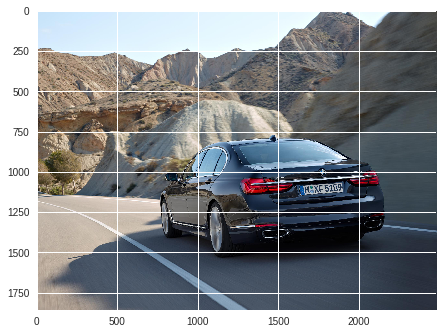

Caption for image 9.jpg:
  0) a car is parked on the side of the road . (p=0.000300)
  1) a car is parked on the side of the road (p=0.000109)
  2) a car parked on the side of a road next to a tree . (p=0.000012)
Exiting.


In [18]:
try:  
  tf.app.run(showandtell)
except SystemExit:
  print("Exiting.")

In [0]:
del_all_flags(FLAGS)

(['checkpoint_path', 'vocab_file'], {})

In [0]:
tf.flags.DEFINE_string("checkpoint_path", "./model2.ckpt-2000000",
                       "Model checkpoint file or directory containing a "
                       "model checkpoint file.")
tf.flags.DEFINE_string("vocab_file", "./word_counts2.txt", "Text file containing the vocabulary.")
tf.logging.set_verbosity(tf.logging.INFO)

In [0]:
try:  
  tf.app.run(showandtell)
except SystemExit:
  print("Exiting.")